In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

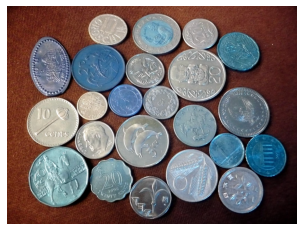

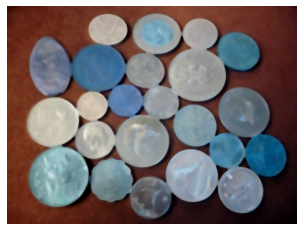

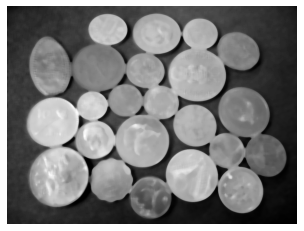

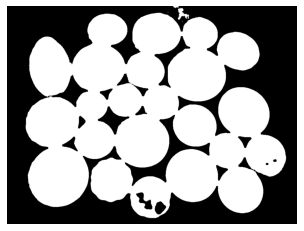

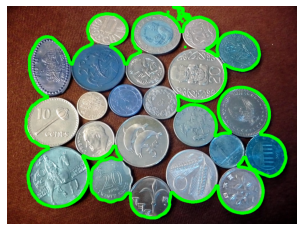

In [11]:
# ice aktar
coin = cv2.imread("coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

#blurring(Detay Kaldırma)
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

#grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap = "gray"), plt.axis("off")

# binary threshold
ret, coin_thresh = cv2.threshold(coin_gray, 75, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap = "gray"), plt.axis("off")

# kontur 
contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# konturları bulduk çizdireceğiz
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours, i, (0,255,0), 10)
plt.figure(), plt.imshow(coin), plt.axis("off")    

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

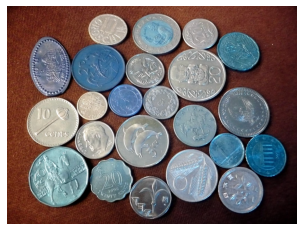

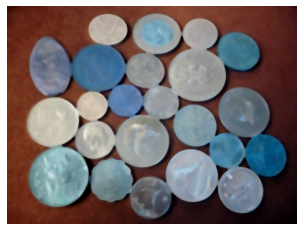

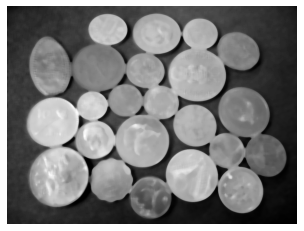

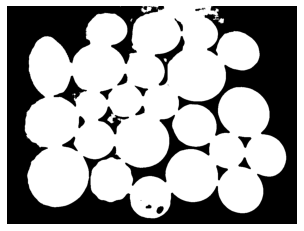

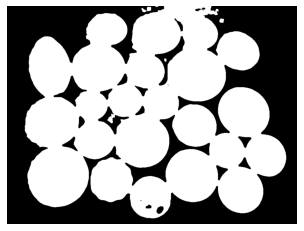

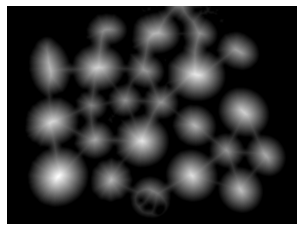

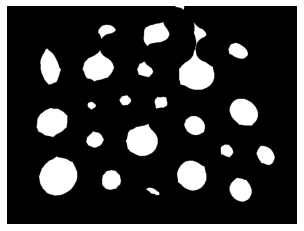

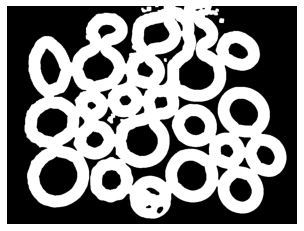

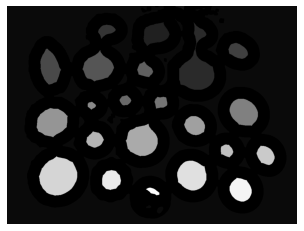

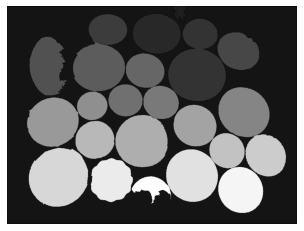

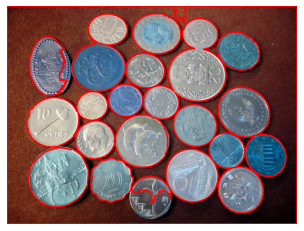

In [42]:
# watershed
# ice aktar
coin = cv2.imread("coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

#blurring(Detay Kaldırma)
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

#grayscale
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap = "gray"), plt.axis("off")

# binary threshold
# nesneler arası köprüler oluştu
ret, coin_thresh = cv2.threshold(coin_gray, 65, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap = "gray"), plt.axis("off")

# Morfolojik operasyon => acılma(erozyon + genisleme)
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.figure(), plt.imshow(opening, cmap = "gray"), plt.axis("off")

# Nesneler arası distance bulalım.
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.figure(), plt.imshow(dist_transform, cmap = "gray"), plt.axis("off")

# Resmi küçült
ret, sure_foreground = cv2.threshold(dist_transform, 0.4*np.max(dist_transform),255,0)
plt.figure(), plt.imshow(sure_foreground, cmap = "gray"), plt.axis("off")

# Arka plan için resmi büyült
sure_background = cv2.dilate(opening, kernel, iterations = 1)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_background,sure_foreground)
plt.figure(), plt.imshow(unknown, cmap="gray"), plt.axis("off")

# Baglantı
ret, marker = cv2.connectedComponents(sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")

# havza
marker = cv2.watershed(coin,marker)
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# kontur
# _, contours, hierarchy = cv2.findContours(coin_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(),plt.imshow(coin),plt.axis("off")